# Fine Tuning Vs Transfer Learning

* Fine tuning is similar to Transfer Learning
* Fine tuning is used when the new classes to be classified are not present in the pretrained and **different** to those classes.
* Fine tuning is micro-adjusting(tweaking) a pre-trained model for specific tasks.
* We dont freeze all the layers in the conv_base of the pretrained model. 
* In our task we freeze till conv4 and train the conv5 layer

In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

# Data Augmentation

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'Dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'Dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [4]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 9s 0us/step


In [6]:
# freeze till conv4 and train the conv5 layer
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base.layers:
    print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [12]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
625/625 [==============================] - 1354s 2s/step - loss: 0.9458 - accuracy: 0.7599 - val_loss: 0.1998 - val_accuracy: 0.9184
Epoch 2/10
625/625 [==============================] - 1621s 3s/step - loss: 0.2640 - accuracy: 0.9031 - val_loss: 0.2373 - val_accuracy: 0.9092
Epoch 3/10
625/625 [==============================] - 1708s 3s/step - loss: 0.2136 - accuracy: 0.9218 - val_loss: 0.1571 - val_accuracy: 0.9404
Epoch 4/10
625/625 [==============================] - 1621s 3s/step - loss: 0.1937 - accuracy: 0.9311 - val_loss: 0.2754 - val_accuracy: 0.9278
Epoch 5/10
625/625 [==============================] - 1816s 3s/step - loss: 0.1928 - accuracy: 0.9301 - val_loss: 0.4131 - val_accuracy: 0.9374
Epoch 6/10
625/625 [==============================] - 1866s 3s/step - loss: 0.1863 - accuracy: 0.9423 - val_loss: 0.2850 - val_accuracy: 0.9426
Epoch 7/10
625/625 [==============================] - 2978s 5s/step - loss: 0.1724 - accuracy: 0.9446 - val_loss: 0.2427 - val_accuracy:

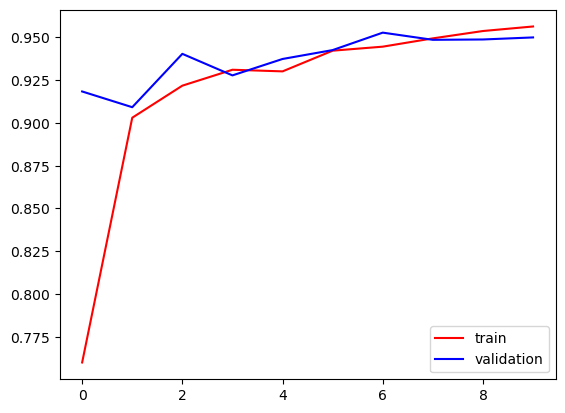

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

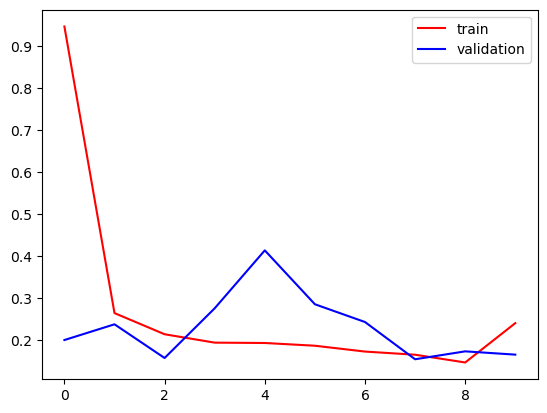

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
# Prediction on new test images

import cv2

def predict_new(path):
    test_img = cv2.imread(path)
    plt.imshow(test_img)
    print(test_img.shape)
    test_img = cv2.resize(test_img,(150,150))
    test_input = test_img.reshape((1,150,150,3))
    print(test_img.shape)
    print(test_input.shape)
    return model.predict(test_input)

predict_new('dog.jpg')

(182, 276, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 68ms/step


array([[1.]], dtype=float32)

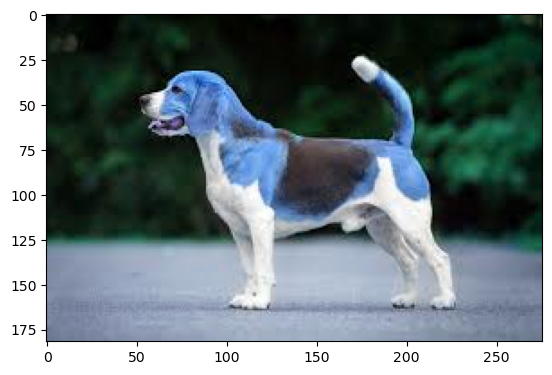

In [26]:
predict_new('dog.jpg')